# Final Voice Quality Analysis
**Author:** Jim Maddock  
**Last Updated:** 9-4-19  
**Description:** The final analysis script for Voice Comparison Survey Data.  Contains all statistical tests and graphs

## Notebook setup
Install and load required packages.  Load data from rdata file.  Convert all measures to correct data type.

In [66]:
if(!require(ggrepel)){install.packages("ggrepel")}
if(!require(gridExtra)){install.packages("gridExtra")}
if(!require(grid)){install.packages("grid")}
if(!require(MASS)){install.packages("MASS")}
if(!require(ggplot2)){install.packages("ggplot2")}
if(!require(forcats)){install.packages("forcats")}
if(!require(wesanderson)){install.packages("wesanderson")}
if(!require(EMT)){install.packages("EMT")}
if(!require(rcompanion)){install.packages("rcompanion")}

In [3]:
dataFile = readline(prompt = "Path to data file: ")
load(dataFile)
data = data[, -c(1:21, 24, 34, 37, 48, 55, 63)]
colnames(data) = c("MID", "audio.paused", "page.seconds", "rate.experience", "rate.speed", "rate.again",
                   "voice.easy", "voice.monotone", "voice.natural", "voice.no_emotion", "voice.focus",
                   "voice.all", "voice.none", "voice.other",
                   "check1", "check2", "check3", "check4", "check5", "check6", "check7", 
                   "age", "gender",
                   "race.asian", "race.hawaiian", "race.aa", "race.cc", "race.latin", "race.indian", "race.other",
                   "income", "state", "device", "device.other", "headphones", "voice")

data = as.data.frame(lapply(data, function (x) if (is.factor(x)) factor(x) else x))
    
data$gender = factor(data$gender, levels = c("", "Man" , "These don't describe me",   "Woman"),
              labels = c("NA", "Male", "Other", "Female"))

data$check1 = ifelse(data$check1 == "An article about dealing with stress", 1, 0)
data$check2 = ifelse(data$check2 == "His constant need for success", 1, 0)
data$check3 = ifelse(data$check3 == "It oxygenates your brain", 1, 0)
data$check4 = ifelse(data$check4 == "2 and 3", 1, 0)
data$check5 = ifelse(data$check5 == "Ask yourself if a thought is really true.", 1, 0)
data$check6 = ifelse(data$check6 == "Everything has to have a purpose", 1, 0)
data$check7 = ifelse(data$check7 == "Do less than you want to do", 1, 0)

data$grade = round(rowMeans(data[, 15:21], na.rm = TRUE),2)*10

data$rate.speed = ordered(data$rate.speed, levels = c("Much too fast", "Too fast", "Just right",
                                                      "Too slow", "Much too slow"))
                          
data$rate.experience = ordered(data$rate.experience, levels = c("Excellent", "Good", "OK", "Poor", "Very poor"))
            

                            

In [4]:
data$rate.experience.simple = data$rate.experience
levels(data$rate.experience.simple) = c('Good','Good','OK','Poor','Poor')

data$rate.speed.simple = data$rate.speed
levels(data$rate.speed.simple) = c('Too fast','Too fast','Just right','Too slow','Too slow')

In [5]:
write.csv(data, file = "~/data/voice_comparison/voice_comparison_final_8-1-19.csv")

## Summary Stats

In [64]:
# number of participants
print(paste("Number of participants:", nrow(data)), quote=FALSE)
# number of voices
print(paste("Number of voices:", length(unique(data$voice))), quote=FALSE)
# number of female
print(paste("gender:", nrow(subset(data,gender == "Female")), "female"), quote=FALSE)

[1] Number of participants: 1090
[1] Number of voices: 22
[1] gender: 444 female


In [65]:
# number of ppts per voice
ppts = as.data.frame(table(data$voice))
ppts[order(ppts$Freq),]
median(ppts$Freq)

,Var1,Freq
,<fct>,<int>
22,Windows Male,38
10,Judy Wave1,41
14,Mozilla TTS:Nancy2,41
13,Mozilla TTS:Nancy,43
17,Polly Matthew,46
21,Windows Female,46
6,Google C,47
4,Android UK Male,48
1,.Abe,49


[1] 50

In [8]:
group_names.voice = c(
  "MozillaTTS:LJSpeech" = paste("MozillaTTS:LJSpeech (", nrow(data[data$voice == "MozillaTTS:LJSpeech",]) ,")", sep = ""),
  "Google A" = paste("Google A (", nrow(data[data$voice == "Google A",]) ,")", sep = ""),
  "Google C" = paste("Google C (", nrow(data[data$voice == "Google C",]) ,")", sep = ""),
  "Polly Joana" = paste("Polly Joana (", nrow(data[data$voice == "Polly Joana",]) ,")", sep = ""),
  "Polly Matthew" = paste("Polly Matthew (", nrow(data[data$voice == "Polly Matthew",]) ,")", sep = ""),
  "Polly Sally" = paste("Polly Sally (", nrow(data[data$voice == "Polly Sally",]) ,")", sep = ""),
  "Voicery Nichole" = paste("Voicery Nichole (", nrow(data[data$voice == "Voicery Nichole",]) ,")", sep = ""),
  "Android UK Male" = paste("Android UK Male (", nrow(data[data$voice == "Android UK Male",]) ,")", sep = ""),
  "iOS Female" = paste("iOS Female (", nrow(data[data$voice == "iOS Female",]) ,")", sep = ""),
  "Mozilla TTS:Nancy" = paste("Mozilla TTS:Nancy (", nrow(data[data$voice == "Mozilla TTS:Nancy",]) ,")", sep = ""),
  "Mozilla TTS:Nancy2" = paste("Mozilla TTS:Nancy2 (", nrow(data[data$voice == "Mozilla TTS:Nancy2",]) ,")", sep = ""),
  "Judy Wave2" = paste("Judy Wave2 (", nrow(data[data$voice == "Judy Wave2",]) ,")", sep = ""),
  "Judy Wave1" = paste("Judy Wave1 (", nrow(data[data$voice == "Judy Wave1",]) ,")", sep = ""),
  "Judy GL2" = paste("Judy GL2 (", nrow(data[data$voice == "Judy GL2",]) ,")", sep = ""),
  "Judy GL1" = paste("Judy GL1 (", nrow(data[data$voice == "Judy GL1",]) ,")", sep = ""),
  ".Jofish" = paste(".Jofish (", nrow(data[data$voice == ".Jofish",]) ,")", sep = ""),
  ".Janice" = paste(".Janice (", nrow(data[data$voice == ".Janice",]) ,")", sep = ""),
  ".Abe" = paste(".Abe (", nrow(data[data$voice == ".Abe",]) ,")", sep = ""),
  "Common Voice" = paste("Common Voice (", nrow(data[data$voice == "Common Voice",]) ,")", sep = ""),
  "Mac Default" = paste("Mac Default (", nrow(data[data$voice == "Mac Default",]) ,")", sep = ""),
  "Text only" = paste("Text only (", nrow(data[data$voice == "Text only",]) ,")", sep = ""),
  "Windows Female" = paste("Windows Female (", nrow(data[data$voice == "Windows Female",]) ,")", sep = ""),
  "Windows Male" = paste("Windows Male (", nrow(data[data$voice == "Windows Male",]) ,")", sep = "")
)

group_names.voice.polly_vs_deep = c(
  "MozillaTTS:LJSpeech" = paste("MozillaTTS:LJSpeech (", nrow(data[data$voice == "MozillaTTS:LJSpeech",]) ,")", sep = ""),
  "Mozilla TTS:Nancy" = paste("Mozilla TTS:Nancy (", nrow(data[data$voice == "Mozilla TTS:Nancy",]) ,")", sep = ""),
  "Mozilla TTS:Nancy2" = paste("Mozilla TTS:Nancy2 (", nrow(data[data$voice == "Mozilla TTS:Nancy2",]) ,")", sep = ""),
  "Judy Wave2" = paste("Judy Wave2 (", nrow(data[data$voice == "Judy Wave2",]) ,")", sep = ""),
  "Judy Wave1" = paste("Judy Wave1 (", nrow(data[data$voice == "Judy Wave1",]) ,")", sep = ""),
  "Judy GL2" = paste("Judy GL2 (", nrow(data[data$voice == "Judy GL2",]) ,")", sep = ""),
  "Judy GL1" = paste("Judy GL1 (", nrow(data[data$voice == "Judy GL1",]) ,")", sep = ""),
  "Polly Joana" = paste("Polly Joana (", nrow(data[data$voice == "Polly Joana",]) ,")", sep = ""),
  "Polly Matthew" = paste("Polly Matthew (", nrow(data[data$voice == "Polly Matthew",]) ,")", sep = ""),
  "Polly Sally" = paste("Polly Sally (", nrow(data[data$voice == "Polly Sally",]) ,")", sep = ""),
  ".Jofish" = paste(".Jofish (", nrow(data[data$voice == ".Jofish",]) ,")", sep = ""),
  ".Janice" = paste(".Janice (", nrow(data[data$voice == ".Janice",]) ,")", sep = ""),
  ".Abe" = paste(".Abe (", nrow(data[data$voice == ".Abe",]) ,")", sep = ""),
  "Text only" = paste("Text only (", nrow(data[data$voice == "Text only",]) ,")", sep = "")
)

group_names.voice.type = c(
  "MozillaTTS:LJSpeech" = "Mozilla TTS",
  "Mozilla TTS:Nancy" = "Mozilla TTS",
  "Mozilla TTS:Nancy2" = "Mozilla TTS",
  "Judy Wave2" = "Mozilla TTS",
  "Judy Wave1" = "Mozilla TTS",
  "Judy GL2" = "Mozilla TTS",
  "Judy GL1" = "Mozilla TTS",
  "Polly Joana" = "Amazon Polly",
  "Polly Matthew" = "Amazon Polly",
  "Polly Sally" = "Amazon Polly",
  ".Jofish" = "Human",
  ".Janice" = "Human",
  ".Abe" = "Human",
  "Text only" = "Text",
  "Google A" = "Other TTS",
  "Google C" = "Other TTS",
  "Voicery Nichole" = "Other TTS",
  "Android UK Male" = "Other TTS",
  "iOS Female" = "Other TTS",
  "Common Voice" = "Other TTS",
  "Mac Default" = "Other TTS",
  "Windows Female" = "Other TTS",
  "Windows Male" = "Other TTS"
)

# broken down by gender ----
group_names.gender = c(
  "Male" = paste("Male (", nrow(data[data$gender == "Male",]) ,")"),
  "Female" = paste("Female (", nrow(data[data$gender == "Female",]) ,")")
)

# broken down by headphone use ----
group_names.headphone = c(
  "No" = paste("No headphones (", nrow(data[data$headphones == "No",]) ,")"),
  "Yes" = paste("Headphones (", nrow(data[data$headphones == "Yes",]) ,")")
)

In [9]:
## Rate experience ----
raw = as.data.frame(table(data$voice, data$rate.experience.simple))
prop = as.data.frame(round(prop.table(table(data$voice, data$rate.experience.simple), margin = 1), digits = 3)*100)
n = as.data.frame(table(data$voice))
colnames(n) = c('Var1','n')
temp = merge(raw,prop,by=c('Var1','Var2'))
temp = merge(temp,n,by='Var1')
temp$se = sqrt(temp$Freq.y*(100-temp$Freq.y)/temp$n)
temp = subset(temp, Var1 %in% names(group_names.voice))
colnames(temp) = c(
    'Voice',
    'Rating',
    'Num_Listeners_per_Rating_per_Voice',
    'Percent_Listeners_per_Rating_per_Voice',
    'Num_Listeners_per_Voice',
    'SE_Percent'
)
write.csv(temp, file = "~/data/voice_comparison/experience_8-1-19.csv")

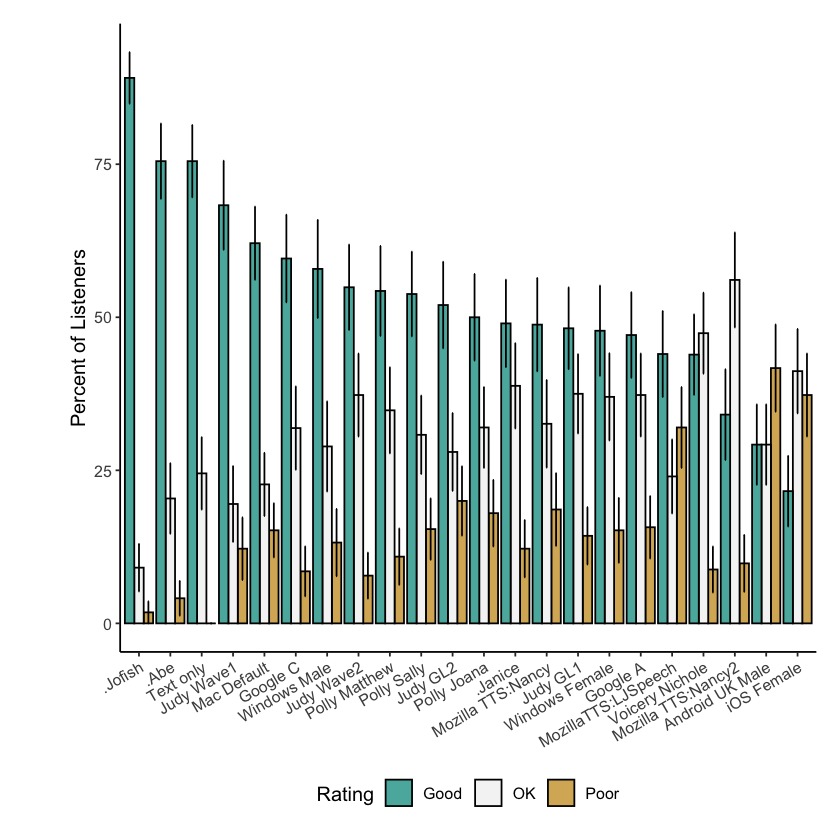

In [10]:
## Rate experience ----
prop = as.data.frame(round(prop.table(table(data$voice, data$rate.experience.simple), margin = 1), digits = 3)*100)
n = as.data.frame(table(data$voice))
colnames(n) = c('Var1','n')
temp = merge(prop,n,by='Var1')
temp$sd = sqrt(temp$Freq*(100-temp$Freq)/temp$n)
temp = subset(temp, Var1 %in% names(group_names.voice))
rank = subset(temp, Var2 == "Good")
rank = rank[order(-rank$Freq),]
rank$rank = rank(rank$Freq)
temp = merge(temp,rank[c("Var1","rank")],by="Var1")
ggplot(temp, aes(x = reorder(Var1,-rank), y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity", color = "black", position=position_dodge()) +
  geom_errorbar(aes(ymin=Freq-sd, ymax=Freq+sd), width=.1,
                 position=position_dodge(.9)) +
  labs(y = "Percent of Listeners") +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)

ggsave("/Users/jmaddock/data/voice_comparison/img/experience_7-12-19.png",height=4,width=7)

In [58]:
prop = as.data.frame(round(prop.table(table(data$voice, data$rate.experience.simple), margin = 1), digits = 3)*100)
n = as.data.frame(table(data$voice))
colnames(n) = c('Var1','n')
temp = merge(prop,n,by='Var1')
temp$sd = sqrt(temp$Freq*(100-temp$Freq)/temp$n)
temp = subset(temp, Var1 %in% names(group_names.voice))
rank = subset(temp, Var2 == "Good")
rank = rank[order(-rank$Freq),]
rank$rank = rank(rank$Freq)
temp = merge(temp,rank[c("Var1","rank")],by="Var1")
temp = subset(temp, Var2 == "Good")
temp[order(temp$rank),]

,Var1,Var2,Freq,n,sd,rank
,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>
21,iOS Female,Good,21.6,51,5.762352,1.0
12,Android UK Male,Good,29.2,48,6.562774,2.0
40,Mozilla TTS:Nancy2,Good,34.1,41,7.403345,3.0
60,Voicery Nichole,Good,43.9,57,6.573191,4.0
45,MozillaTTS:LJSpeech,Good,44.0,50,7.019972,5.0
13,Google A,Good,47.1,51,6.989614,6.0
63,Windows Female,Good,47.8,46,7.364958,7.0
24,Judy GL1,Good,48.2,56,6.677200,8.0
39,Mozilla TTS:Nancy,Good,48.8,43,7.622732,9.0


In [60]:
prop = as.data.frame(round(prop.table(table(data$voice, data$rate.experience.simple), margin = 1), digits = 3)*100)
n = as.data.frame(table(data$voice))
colnames(n) = c('Var1','n')
temp = merge(prop,n,by='Var1')
temp$sd = sqrt(temp$Freq*(100-temp$Freq)/temp$n)
temp = subset(temp, Var1 %in% names(group_names.voice))
rank = subset(temp, Var2 == "Poor")
rank = rank[order(-rank$Freq),]
rank$rank = rank(rank$Freq)
temp = merge(temp,rank[c("Var1","rank")],by="Var1")
temp = subset(temp, Var2 == "Poor")
temp[order(temp$rank),]

,Var1,Var2,Freq,n,sd,rank
,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>
55,Text only,Poor,0.0,53,0.000000,1.0
7,.Jofish,Poor,1.8,55,1.792713,2.0
2,.Abe,Poor,4.1,49,2.832717,3.0
31,Judy Wave2,Poor,7.8,51,3.755153,4.0
16,Google C,Poor,8.5,47,4.067908,5.0
58,Voicery Nichole,Poor,8.8,57,3.752333,6.0
41,Mozilla TTS:Nancy2,Poor,9.8,41,4.643275,7.0
49,Polly Matthew,Poor,10.9,46,4.594870,8.0
4,.Janice,Poor,12.2,49,4.675512,9.5


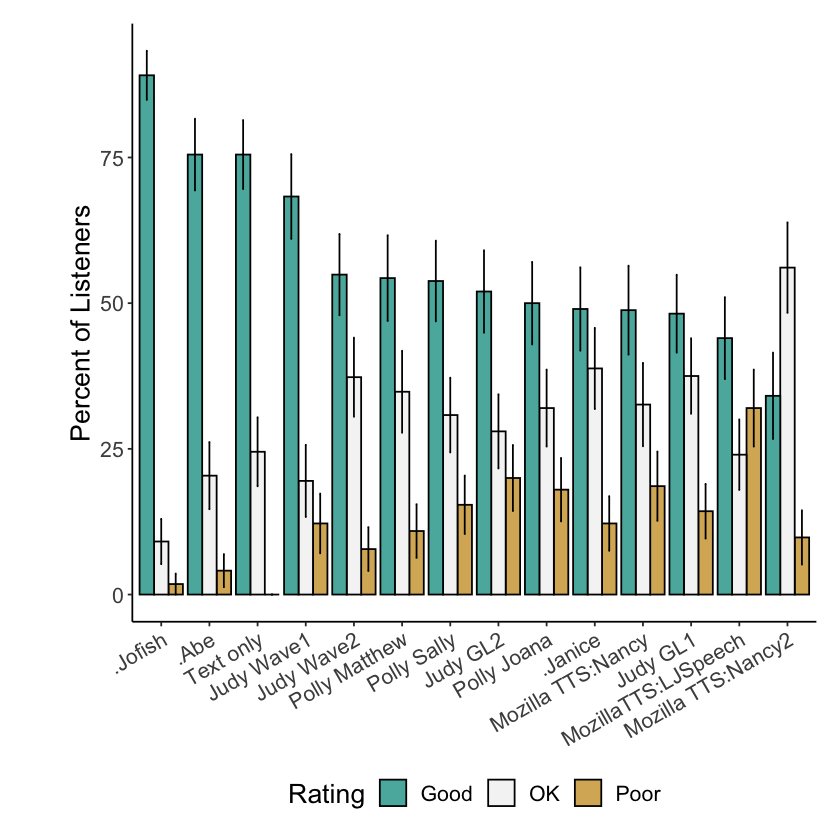

In [11]:
## Rate experience ----
prop = as.data.frame(round(prop.table(table(data$voice, data$rate.experience.simple), margin = 1), digits = 3)*100)
n = as.data.frame(table(data$voice))
colnames(n) = c('Var1','n')
temp = merge(prop,n,by='Var1')
temp$sd = sqrt(temp$Freq*(100-temp$Freq)/temp$n)
temp = subset(temp, Var1 %in% names(group_names.voice))
temp = subset(temp, Var1 %in% names(group_names.voice.polly_vs_deep))
rank = subset(temp, Var2 == "Good")
rank = rank[order(-rank$Freq),]
rank$rank = rank(rank$Freq)
temp = merge(temp,rank[c("Var1","rank")],by="Var1")

ggplot(temp, aes(x = reorder(Var1,-rank), y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity", color = "black", position=position_dodge()) + 
  geom_errorbar(aes(ymin=Freq-sd, ymax=Freq+sd), width=.1,
                 position=position_dodge(.9)) +
  labs(y = "Percent of Listeners") +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=16),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)

ggsave("/Users/jmaddock/data/voice_comparison/img/moz_vs_polly_experience_7-12-19.png",height=4,width=7)

In [12]:
# perform Kruskal-Wallis rank sum test to determine statistical difference between speed ratings
temp = subset(data, voice %in% names(group_names.voice.polly_vs_deep))
kruskal.test(rate.experience.simple ~ voice, data = temp)


	Kruskal-Wallis rank sum test

data:  rate.experience.simple by voice
Kruskal-Wallis chi-squared = 60.485, df = 13, p-value = 4.301e-08


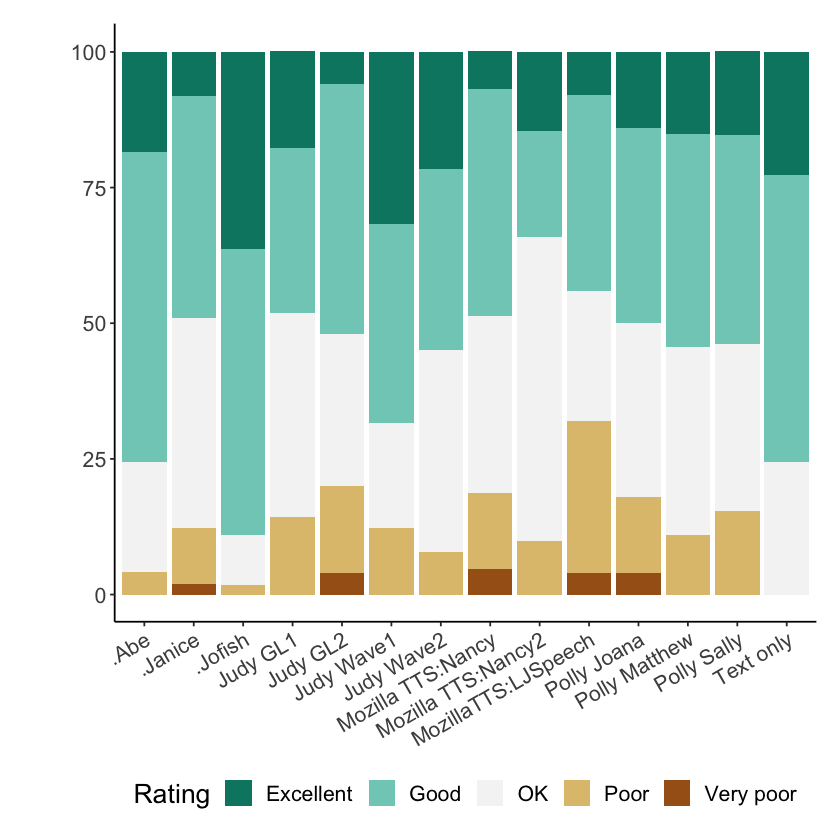

In [13]:
## Rate experience ----
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.experience), margin = 1), digits = 3)*100)
temp = subset(temp, Var1 %in% names(group_names.voice.polly_vs_deep))

ggplot(temp, aes(x = Var1, y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity") + 
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=16),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)

#ggsave("/Users/jmaddock/data/voice_comparison/img/experience.png",height=4,width=7)

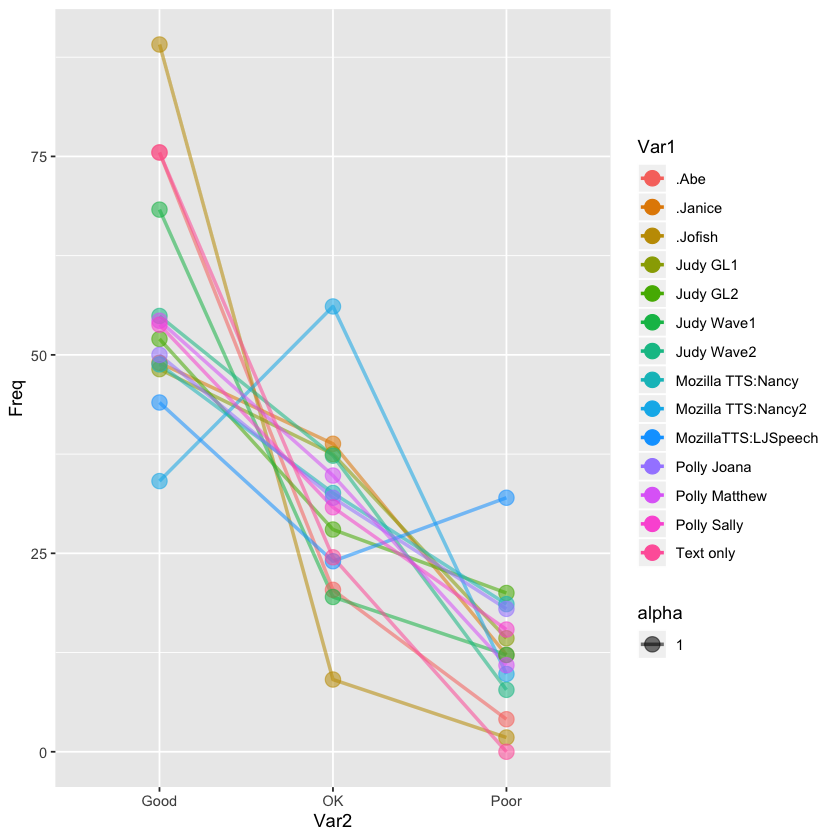

In [14]:
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.experience.simple), margin = 1), digits = 3)*100)
temp = subset(temp, Var1 %in% names(group_names.voice.polly_vs_deep))

ggplot(data = temp, aes(x = Var2, y = Freq, group = Var1)) +
  geom_line(aes(color = Var1, alpha = 1), size = 1) +
  geom_point(aes(color = Var1, alpha = 1), size = 4)
#  scale_y_reverse(breaks = 1:nrow(temp.Freq))

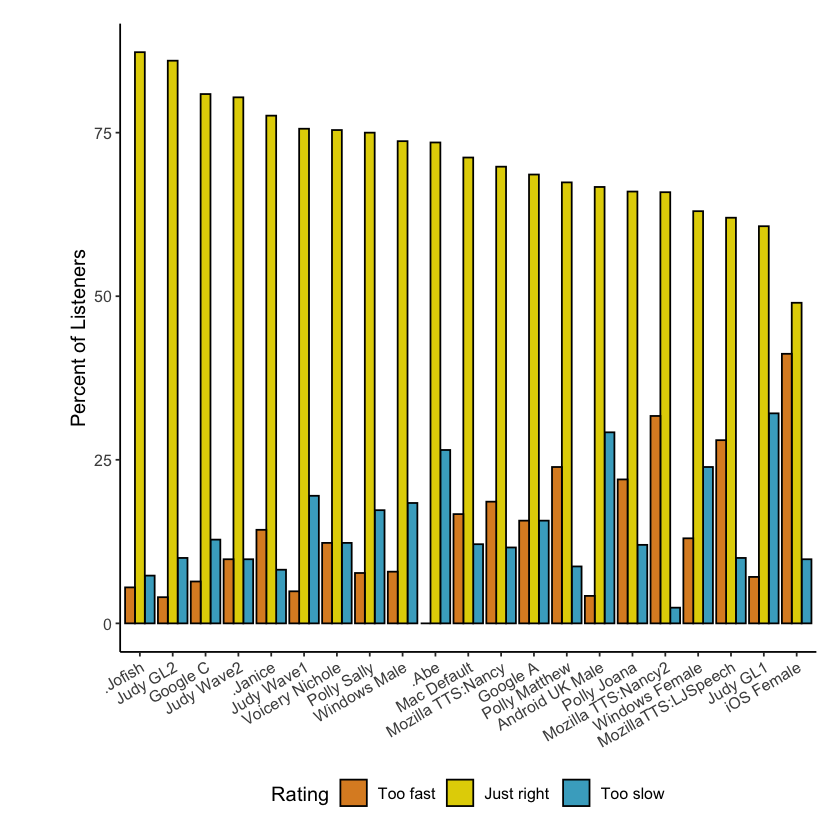

In [15]:
## Rate speed ----
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.speed.simple), margin = 1), digits = 3)*100)
temp = subset(temp, Var1 %in% names(group_names.voice) & Var1 != "Text only")
rank = subset(temp, Var2 == "Just right")
rank = rank[order(-rank$Freq),]
rank$rank = rank(rank$Freq)
temp = merge(temp,rank[c("Var1","rank")],by="Var1")

ggplot(temp, aes(x = reorder(Var1,-rank), y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity", color = "black", position=position_dodge()) + 
  labs(y = "Percent of Listeners") +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_manual(values = wes_palette("FantasticFox1", n = 3))
  #scale_fill_brewer(palette = "BrBG", direction = -1)

ggsave("/Users/jmaddock/data/voice_comparison/img/speed_7-15-19.png",height=4,width=7)

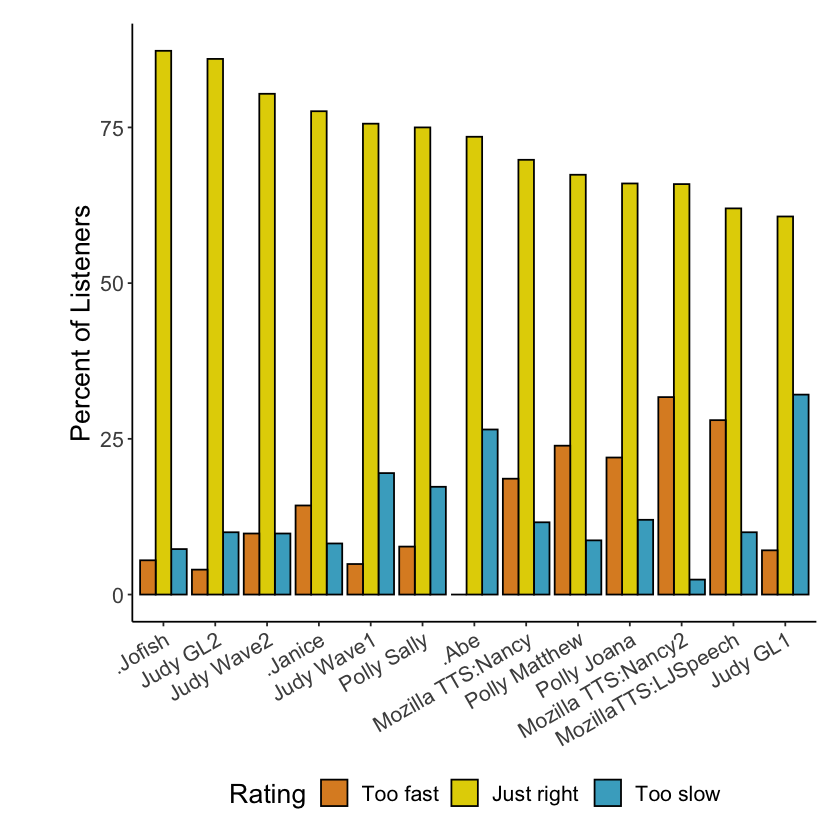

In [16]:
## Rate Speed ----
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.speed.simple), margin = 1), digits = 3)*100)
temp = subset(temp, Var1 %in% names(group_names.voice.polly_vs_deep) & Var1 != "Text only")
rank = subset(temp, Var2 == "Just right")
rank = rank[order(-rank$Freq),]
rank$rank = rank(rank$Freq)
temp = merge(temp,rank[c("Var1","rank")],by="Var1")

ggplot(temp, aes(x = reorder(Var1,-rank), y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity", color = "black", position=position_dodge()) + 
  labs(y = "Percent of Listeners") +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=16),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_manual(values = wes_palette("FantasticFox1", n = 3))
  #scale_fill_brewer(palette = "BrBG", direction = -1)

ggsave("/Users/jmaddock/data/voice_comparison/img/moz_vs_polly_speed_7-15-19.png",height=4,width=7)

In [17]:
# perform Kruskal-Wallis rank sum test to determine statistical difference between speed ratings
temp = subset(data, voice %in% names(group_names.voice.polly_vs_deep))
kruskal.test(rate.speed.simple ~ voice, data = temp)


	Kruskal-Wallis rank sum test

data:  rate.speed.simple by voice
Kruskal-Wallis chi-squared = 57.557, df = 12, p-value = 6.27e-08


Warning message:
“Removed 3 rows containing missing values (geom_path).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

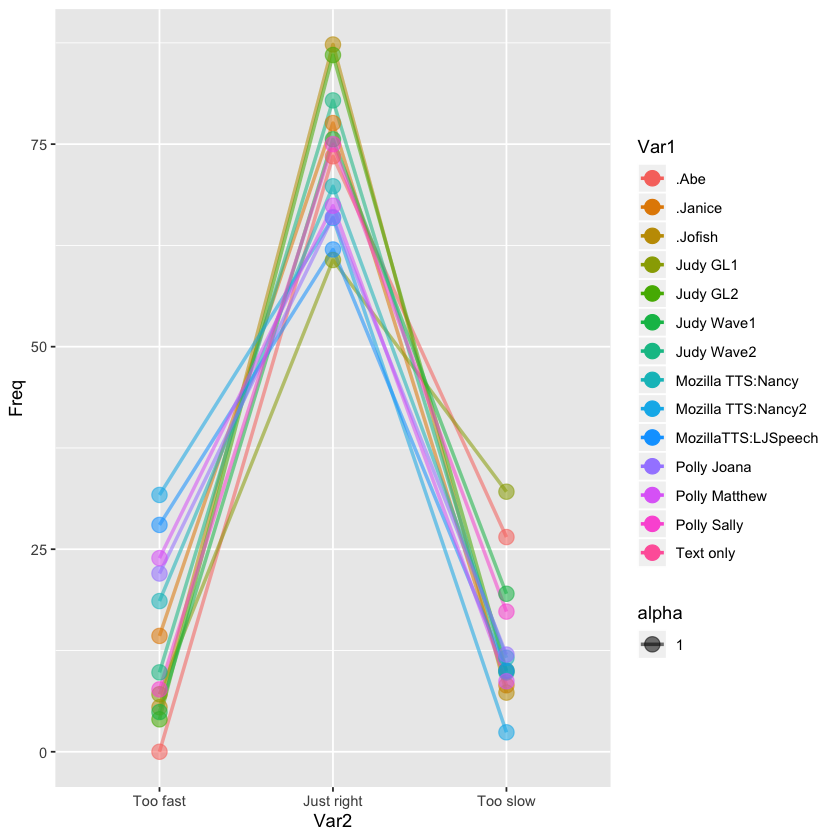

In [18]:
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.speed.simple), margin = 1), digits = 3)*100)
temp = subset(temp, Var1 %in% names(group_names.voice.polly_vs_deep))

ggplot(data = temp, aes(x = Var2, y = Freq, group = Var1)) +
  geom_line(aes(color = Var1, alpha = 1), size = 1) +
  geom_point(aes(color = Var1, alpha = 1), size = 4)
#  scale_y_reverse(breaks = 1:nrow(temp.Freq))

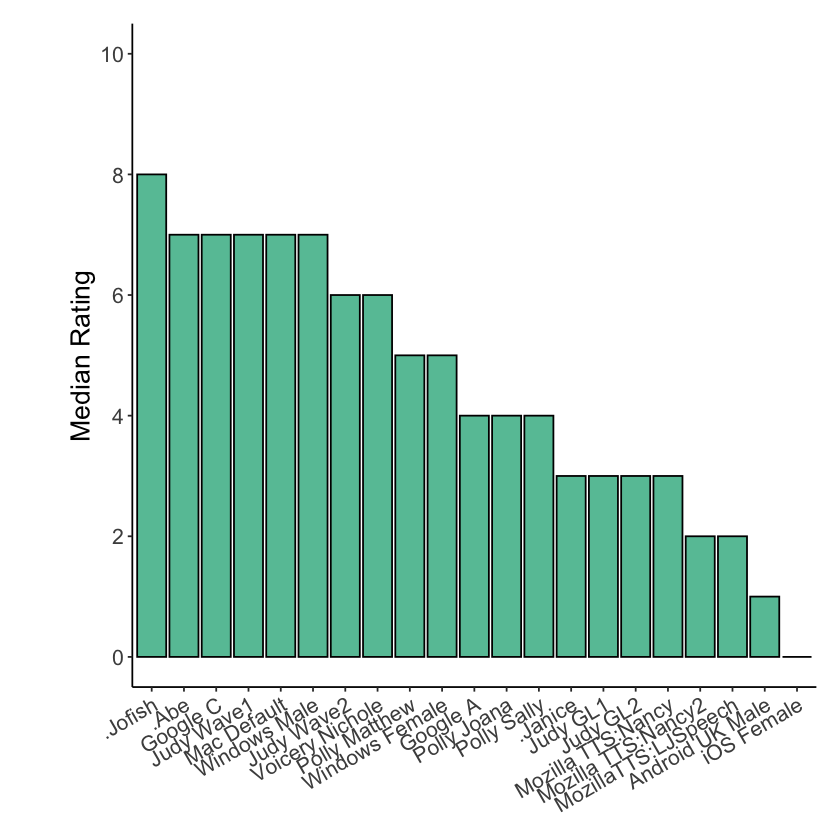

In [19]:
temp = data
temp = aggregate(rate.again ~ voice, data=temp, FUN = "median")
temp = subset(temp, voice %in% names(group_names.voice))
#temp = merge(temp,group_names.voice.type,by.x='voice',by.y=0)

ggplot(temp, aes(x = reorder(voice,-rate.again), y = rate.again, fill="",
                 label = voice)) +
  geom_bar(stat="identity", color = "black") + 
  theme_classic() +
  labs(y = "Median Rating") +
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=16),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "none") +
        guides(fill = guide_legend(title = "Voice Type")) +
  scale_fill_brewer(palette = "Set2", direction = -1) +
  scale_y_continuous(limits=c(0,10),breaks=seq(0,10,2)) 

ggsave("/Users/jmaddock/data/voice_comparison/img/listen_again_7-12-19.png",height=4,width=7)

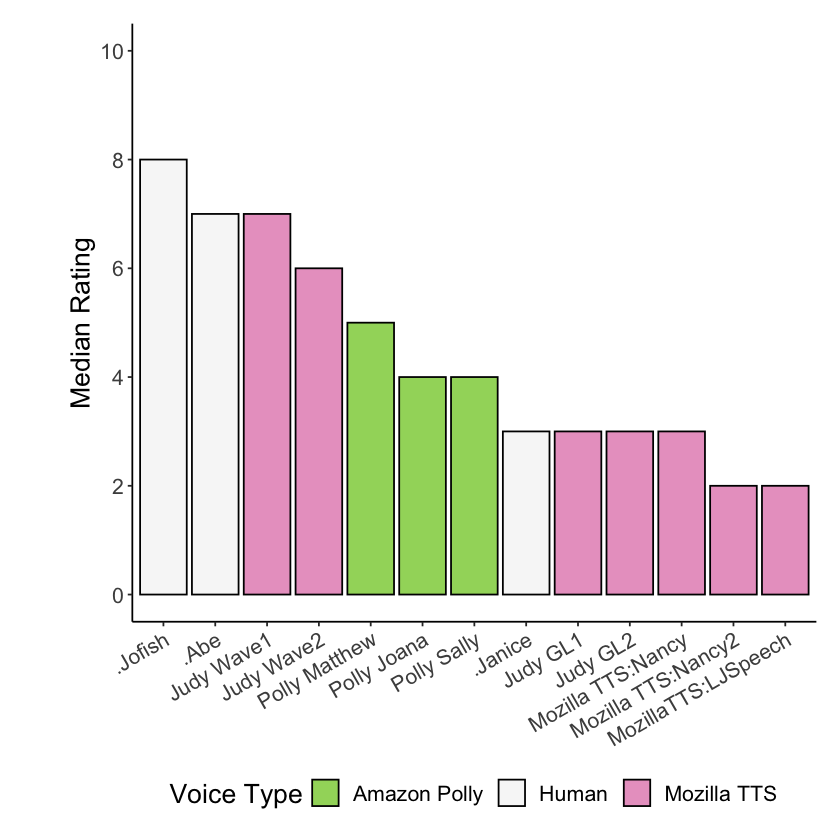

In [20]:
temp = data
temp = aggregate(rate.again ~ voice, data=temp, FUN = "median")
temp = subset(temp, voice %in% names(group_names.voice.polly_vs_deep))
temp = merge(temp,group_names.voice.type,by.x='voice',by.y=0)

ggplot(temp, aes(x = reorder(voice,-rate.again), y = rate.again, fill=y,
                 label = voice)) +
  geom_bar(stat="identity", color = "black") + 
  theme_classic() +
  labs(y = "Median Rating") +
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=16),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
        guides(fill = guide_legend(title = "Voice Type")) +
  scale_fill_brewer(palette = "PiYG", direction = -1) +
  scale_y_continuous(limits=c(0,10),breaks=seq(0,10,2))

ggsave("/Users/jmaddock/data/voice_comparison/img/moz_vs_polly_listen_again_7-15-19.png",height=4,width=7)

In [21]:
# perform Kruskal-Wallis rank sum test to determine statistical difference between speed ratings
temp = subset(data, voice %in% names(group_names.voice.polly_vs_deep))
kruskal.test(rate.again ~ voice, data = temp)


	Kruskal-Wallis rank sum test

data:  rate.again by voice
Kruskal-Wallis chi-squared = 74.935, df = 12, p-value = 3.78e-11


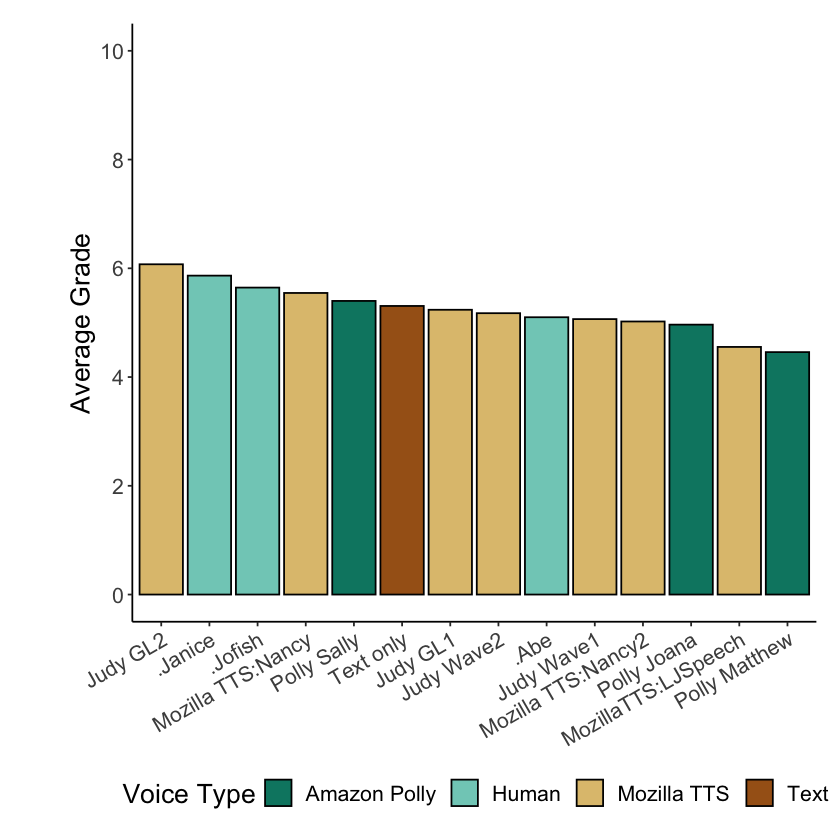

In [22]:
temp = data
temp = aggregate(grade ~ voice, data=temp, FUN = "mean")
temp = subset(temp, voice %in% names(group_names.voice.polly_vs_deep))
temp = merge(temp, group_names.voice.type, by.x='voice', by.y=0)

ggplot(temp, aes(x = reorder(voice,-grade), y = grade, fill=y,
                 label = voice)) +
  geom_bar(stat="identity", color = "black") + 
  theme_classic() +
  labs(y = "Average Grade") +
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=16),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_text(size = ),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
        guides(fill = guide_legend(title = "Voice Type")) +
  scale_fill_brewer(palette = "BrBG", direction = -1) +
  scale_y_continuous(limits=c(0,10),breaks=seq(0,10,2))

ggsave("/Users/jmaddock/data/voice_comparison/img/grades_7-15-19.png",height=4,width=7)

In [45]:
temp = data
temp = aggregate(grade ~ voice, data=temp, FUN = "mean")
temp = subset(temp, voice %in% names(group_names.voice))
temp = merge(temp, group_names.voice.type, by.x='voice', by.y=0)
temp[order(temp$grade),]

,voice,grade,y
,<fct>,<dbl>,<fct>
22,Windows Male,4.063158,Other TTS
12,Mac Default,4.203030,Other TTS
21,Windows Female,4.254348,Other TTS
6,Google C,4.317021,Other TTS
17,Polly Matthew,4.458696,Amazon Polly
15,MozillaTTS:LJSpeech,4.554000,Mozilla TTS
20,Voicery Nichole,4.891228,Other TTS
16,Polly Joana,4.964000,Amazon Polly
14,Mozilla TTS:Nancy2,5.021951,Mozilla TTS


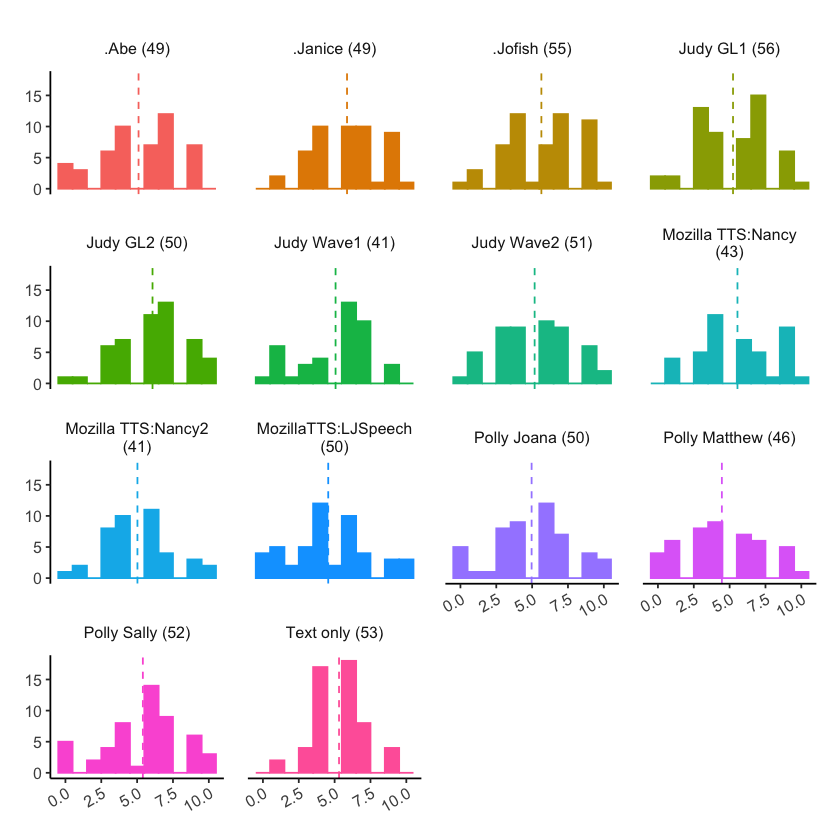

In [24]:
temp = subset(data, voice %in% names(group_names.voice.polly_vs_deep))

median = aggregate(grade ~ voice, data=temp, FUN = "mean")

ggplot(temp, aes(x = grade, color = voice, fill = voice)) +
  geom_histogram(stat = "bin", binwidth = 1) +
  #geom_density(alpha = 0.1) +
  facet_wrap( ~ voice, ncol = 4, labeller = as_labeller(group_names.voice.polly_vs_deep, label_wrap_gen(width = 20)), drop = TRUE) +
  guides(color = FALSE, fill=FALSE) + 
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(1, "lines")) +
  geom_vline(data=median, aes(xintercept=grade, color=voice),
             linetype="dashed")

ggsave("/Users/jmaddock/data/voice_comparison/img/grades.png",height=5,width=7)

In [47]:
# anova to determine relationship between voice and grade
temp = subset(data, voice %in% names(group_names.voice.polly_vs_deep))
summary(aov(grade ~ voice, data = temp))

             Df Sum Sq Mean Sq F value Pr(>F)  
voice        13    128   9.866   1.713  0.054 .
Residuals   672   3870   5.758                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [46]:
# anova to determine relationship between voice and grade
temp = subset(data, voice %in% names(group_names.voice))
summary(aov(grade ~ voice, data = temp))

              Df Sum Sq Mean Sq F value   Pr(>F)    
voice         21    315  14.983   2.491 0.000224 ***
Residuals   1068   6425   6.016                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [49]:
# anova to determine relationship between voice and grade (no humans or text)
temp = subset(data, (voice %in% names(group_names.voice)) & !(voice %in% c('.Janice','.Abe','.Jofish','Text only')))
summary(aov(grade ~ voice, data = temp))

             Df Sum Sq Mean Sq F value Pr(>F)   
voice        17    251  14.757   2.347 0.0016 **
Residuals   866   5446   6.289                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [51]:
tss = subset(data, !(voice %in% c('Text only','.Janice','.Jofish','.Abe')))
text = subset(data, voice == "Text only")
t.test(tss$grade, text$grade)


	Welch Two Sample t-test

data:  tss$grade and text$grade
t = -1.4528, df = 67.6, p-value = 0.1509
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8384856  0.1319885
sample estimates:
mean of x mean of y 
 4.954299  5.307547 


In [52]:
tss = subset(data, !(voice %in% c('Text only','.Janice','.Jofish','.Abe')))
human = subset(data, voice %in% c('.Janice','.Jofish','.Abe'))
t.test(tss$grade, human$grade)


	Welch Two Sample t-test

data:  tss$grade and human$grade
t = -2.8007, df = 217.16, p-value = 0.005559
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9998822 -0.1738735
sample estimates:
mean of x mean of y 
 4.954299  5.541176 


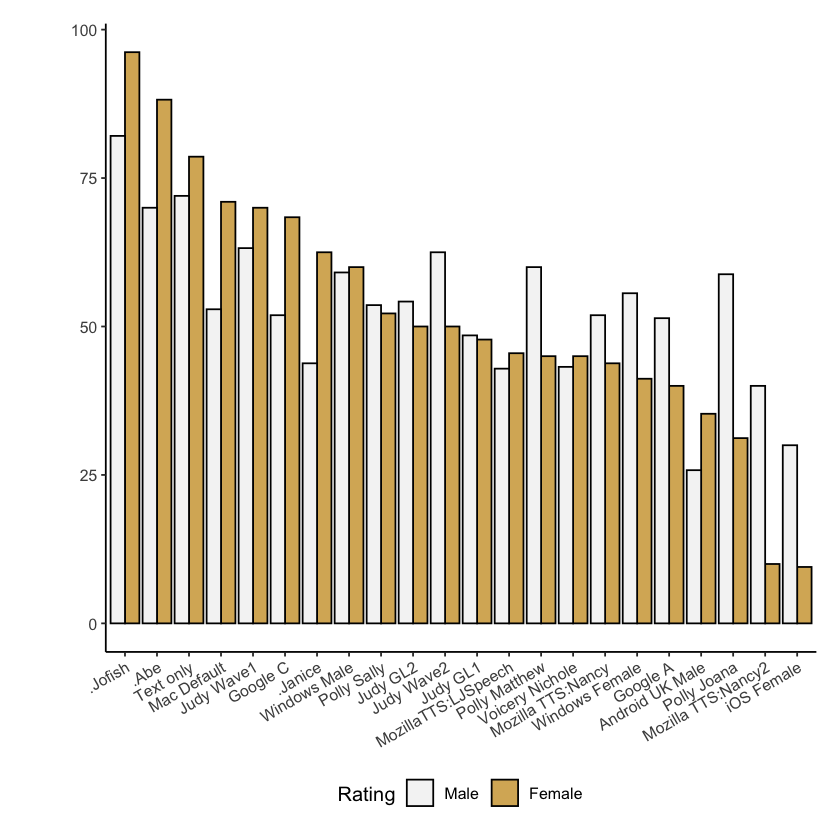

In [26]:
# broken down by gender ----
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.experience.simple, data$gender), c(3,1)), digits = 3)*100)
temp = subset(temp, Var3 %in% names(group_names.gender) & Var1 %in% names(group_names.voice) & Var2 == "Good")
rank = subset(temp, Var3 == "Female")
rank = rank[order(-rank$Freq),]
rank$rank = rank(rank$Freq)
temp = merge(temp,rank[c("Var1","rank")],by="Var1")

ggplot(temp, aes(x = reorder(Var1,-rank), y = Freq, fill = Var3, 
                 label = Freq)) +
  geom_bar(stat="identity", color = "black", position=position_dodge()) + 
  #facet_wrap( ~ Var3, labeller = as_labeller(group_names.gender)) +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)

ggsave("/Users/jmaddock/data/voice_comparison/img/gender.png",height=4,width=10)

In [27]:
# perform wilcox ranked sum test on rating differences by gender
temp = subset(data, gender %in% names(group_names.gender) & voice %in% names(group_names.voice))
wilcox.test(as.numeric(rate.experience) ~ gender, data=temp)


	Wilcoxon rank sum test with continuity correction

data:  as.numeric(rate.experience) by gender
W = 145882, p-value = 0.2072
alternative hypothesis: true location shift is not equal to 0


In [28]:
temp = subset(data, gender %in% names(group_names.gender) & voice %in% names(group_names.voice))
m = polr(formula = rate.experience.simple ~ gender + voice + headphones + gender*voice, data = temp, Hess = TRUE)


## store table
ctable <- coef(summary(m))
## calculate and store p values
p <- pnorm(abs(ctable[, "t value"]), lower.tail = FALSE) * 2
## combined table
(ctable <- cbind(ctable, "p value" = p))


Warning message in polr(formula = rate.experience.simple ~ gender + voice + headphones + :
“design appears to be rank-deficient, so dropping some coefs”

,Value,Std. Error,t value,p value
genderMale,1.1105586,0.8494972,1.3073128,1.911065e-01
voice.Janice,1.4631684,0.9053235,1.6161829,1.060548e-01
voice.Jofish,-1.2850158,1.2676006,-1.0137387,3.107075e-01
voiceAndroid UK Male,2.6451626,0.8815860,3.0004590,2.695730e-03
voiceGoogle A,2.1889708,0.8868412,2.4682782,1.357648e-02
voiceGoogle C,1.2196111,0.8951565,1.3624558,1.730541e-01
voiceiOS Female,3.8080053,0.8570041,4.4433921,8.855158e-06
voiceJudy GL1,1.8157602,0.8442194,2.1508156,3.149076e-02
voiceJudy GL2,1.9043279,0.8388815,2.2700798,2.320274e-02
voiceJudy Wave1,1.1738979,0.8955500,1.3108122,1.899212e-01


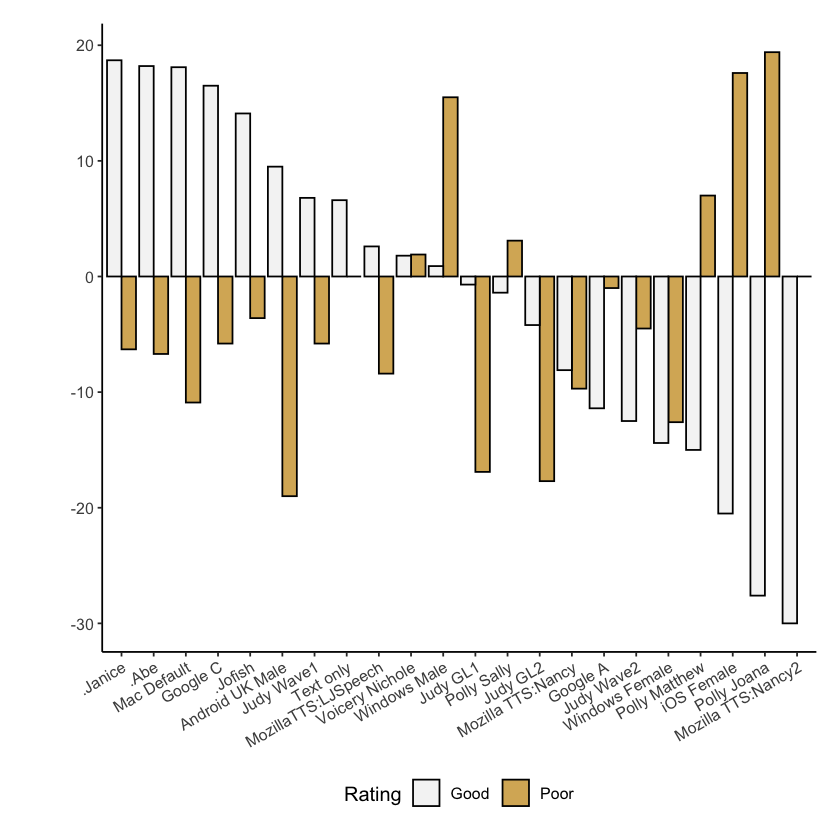

In [29]:
# broken down by gender ----
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.experience.simple, data$gender), c(3,1)), digits = 3)*100)
temp = subset(temp, Var3 %in% names(group_names.gender) & Var1 %in% names(group_names.voice) & Var2 %in% c("Good","Poor"))
f = subset(temp, Var3 == "Female")
m = subset(temp, Var3 == "Male")
temp = merge(f, m, by = c("Var1","Var2"))
temp$diff = temp$Freq.x - temp$Freq.y
rank = subset(temp, Var2 == "Good")
rank = rank[order(-rank$diff),]
rank$rank = rank(rank$diff)
temp = merge(temp,rank[c("Var1","rank")],by="Var1")

ggplot(temp, aes(x = reorder(Var1,-rank), y = diff, fill = Var2)) +
  geom_bar(stat="identity", color = "black", position = position_dodge()) + 
  #facet_wrap( ~ Var2, labeller = as_labeller(c("Good","Poor"))) +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)

#ggsave("/Users/jmaddock/data/voice_comparison/img/gender_7-15-19.png",height=4,width=10)

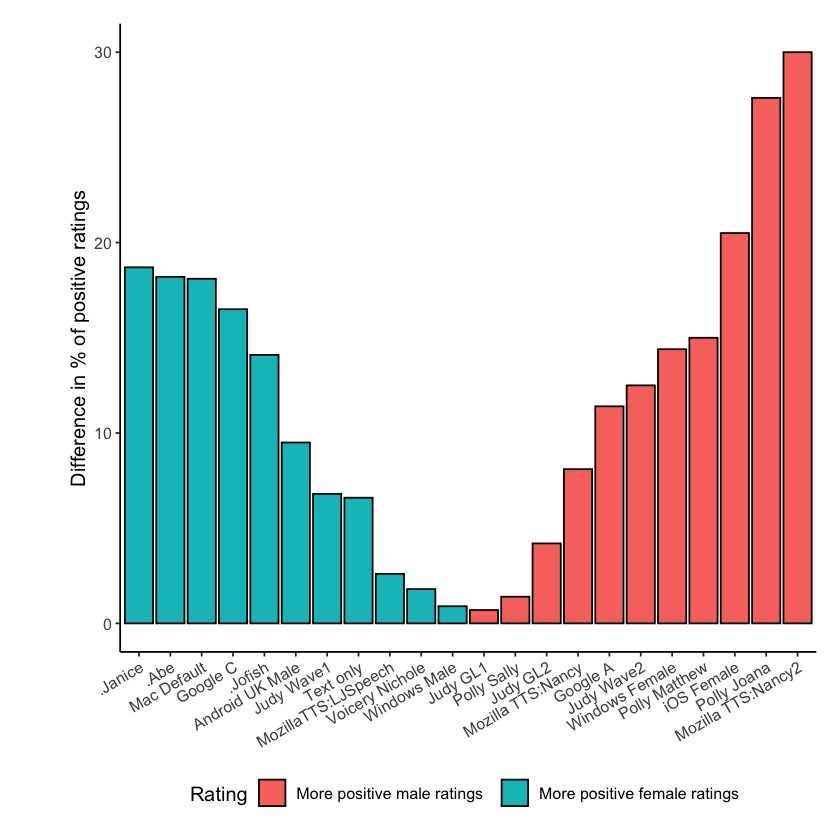

In [30]:
# broken down by gender ----
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.experience.simple, data$gender), c(3,1)), digits = 3)*100)
temp = subset(temp, Var3 %in% names(group_names.gender) & Var1 %in% names(group_names.voice) & Var2 %in% c("Good"))
f = subset(temp, Var3 == "Female")
m = subset(temp, Var3 == "Male")
temp = merge(f, m, by = c("Var1","Var2"))
temp$diff = temp$Freq.x - temp$Freq.y
rank = subset(temp, Var2 == "Good")
rank = rank[order(-rank$diff),]
rank$rank = rank(rank$diff)
temp = merge(temp,rank[c("Var1","rank")],by="Var1")
temp$sign = factor(sign(temp$diff), levels=c(-1,1), labels=c("More positive male ratings","More positive female ratings"))

ggplot(temp, aes(x = reorder(Var1,-rank), y = abs(diff), fill = sign)) +
  geom_bar(stat="identity", color = "black") + 
  labs(y = "Difference in % of positive ratings") +
  #facet_wrap( ~ Var2, labeller = as_labeller(c("Good","Poor"))) +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_colour_brewer(palette = "PRGn")
  #scale_fill_manual(values = wes_palette("Darjeeling2", n = 2))

ggsave("/Users/jmaddock/data/voice_comparison/img/gender_7-15-19.png",height=4,width=7)

In [31]:
# broken down by gender ----
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.experience.simple, data$gender), c(3,1)), digits = 3)*100)
temp = subset(temp, Var3 %in% names(group_names.gender) & Var1 %in% names(group_names.voice) & Var2 == "Good")
m = subset(temp, Var3 == "Male")
f = subset(temp, Var3 == "Female")
t.test(m$Freq, f$Freq, paired = TRUE, alternative = "two.sided")


	Paired t-test

data:  m$Freq and f$Freq
t = 0.46553, df = 21, p-value = 0.6463
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.043150  7.952241
sample estimates:
mean of the differences 
               1.454545 


In [32]:
# broken down by gender ----
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.experience.simple, data$gender), c(3,1)), digits = 3)*100)
temp = subset(temp, Var3 %in% names(group_names.gender) & Var1 %in% names(group_names.voice) & Var2 == "Poor")
m = subset(temp, Var3 == "Male")
f = subset(temp, Var3 == "Female")
t.test(m$Freq, f$Freq, paired = TRUE, alternative = "two.sided")


	Paired t-test

data:  m$Freq and f$Freq
t = 1.2875, df = 21, p-value = 0.2119
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.801004  7.655549
sample estimates:
mean of the differences 
               2.927273 


In [33]:
temp = subset(data, voice %in% names(group_names.voice.polly_vs_deep))

voice.easy = as.data.frame.matrix(round(table(temp$voice, temp$voice.easy)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.monotone = as.data.frame.matrix(round(table(temp$voice, temp$voice.monotone)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.natural = as.data.frame.matrix(round(table(temp$voice, temp$voice.natural)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.no_emotion = as.data.frame.matrix(round(table(temp$voice, temp$voice.no_emotion)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.focus = as.data.frame.matrix(round(table(temp$voice, temp$voice.focus)/(as.vector(t(table(temp$voice)))), digits = 3)*100)

result = data.frame(voice.easy,voice=rownames(voice.easy))
result = merge(result, data.frame(voice.monotone,voice = rownames(voice.monotone)), by="voice")
result = merge(result, data.frame(voice.natural,voice = rownames(voice.natural)), by="voice")
result = merge(result, data.frame(voice.no_emotion,voice = rownames(voice.no_emotion)), by="voice")
result = merge(result, data.frame(voice.focus,voice = rownames(voice.focus)), by="voice")
result = subset(result, voice %in% names(group_names.voice.polly_vs_deep))
t(result)

,1,2,3,8,9,10,11,13,14,15,16,17,18,19
voice,.Abe,.Janice,.Jofish,Judy GL1,Judy GL2,Judy Wave1,Judy Wave2,Mozilla TTS:Nancy,Mozilla TTS:Nancy2,MozillaTTS:LJSpeech,Polly Joana,Polly Matthew,Polly Sally,Text only
Voice.was.easy.to.comprehend.,73.5,57.1,83.6,50.0,42.0,63.4,56.9,58.1,46.3,26.0,56.0,50.0,57.7,0.0
Voice.is.monotone.,36.7,16.3,14.5,64.3,66.0,39.0,47.1,58.1,61.0,70.0,64.0,65.2,61.5,0.0
Voice.sounded.natural.,57.1,67.3,74.5,26.8,12.0,36.6,27.5,11.6,14.6,20.0,18.0,15.2,13.5,0.0
Voice.lacked.emotion.personality.,32.7,22.4,9.1,71.4,70.0,53.7,49.0,83.7,65.9,60.0,62.0,63.0,63.5,0.0
I.could.focus.on.the.content.,61.2,59.2,72.7,44.6,54.0,53.7,45.1,51.2,56.1,14.0,46.0,37.0,46.2,0.0


In [34]:
options(repr.matrix.max.cols=50)
temp = subset(data, voice %in% names(group_names.voice))

voice.easy = as.data.frame.matrix(round(table(temp$voice, temp$voice.easy)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.monotone = as.data.frame.matrix(round(table(temp$voice, temp$voice.monotone)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.natural = as.data.frame.matrix(round(table(temp$voice, temp$voice.natural)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.no_emotion = as.data.frame.matrix(round(table(temp$voice, temp$voice.no_emotion)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.focus = as.data.frame.matrix(round(table(temp$voice, temp$voice.focus)/(as.vector(t(table(temp$voice)))), digits = 3)*100)

result = data.frame(voice.easy,voice=rownames(voice.easy))
result = merge(result, data.frame(voice.monotone,voice = rownames(voice.monotone)), by="voice")
result = merge(result, data.frame(voice.natural,voice = rownames(voice.natural)), by="voice")
result = merge(result, data.frame(voice.no_emotion,voice = rownames(voice.no_emotion)), by="voice")
result = merge(result, data.frame(voice.focus,voice = rownames(voice.focus)), by="voice")
result = subset(result, voice %in% names(group_names.voice))
t(result)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
voice,.Abe,.Janice,.Jofish,Android UK Male,Google A,Google C,iOS Female,Judy GL1,Judy GL2,Judy Wave1,Judy Wave2,Mac Default,Mozilla TTS:Nancy,Mozilla TTS:Nancy2,MozillaTTS:LJSpeech,Polly Joana,Polly Matthew,Polly Sally,Text only,Voicery Nichole,Windows Female,Windows Male
Voice.was.easy.to.comprehend.,73.5,57.1,83.6,22.9,49.0,55.3,27.5,50.0,42.0,63.4,56.9,47.0,58.1,46.3,26.0,56.0,50.0,57.7,0.0,42.1,52.2,42.1
Voice.is.monotone.,36.7,16.3,14.5,75.0,52.9,48.9,88.2,64.3,66.0,39.0,47.1,47.0,58.1,61.0,70.0,64.0,65.2,61.5,0.0,52.6,52.2,50.0
Voice.sounded.natural.,57.1,67.3,74.5,12.5,19.6,21.3,2.0,26.8,12.0,36.6,27.5,25.8,11.6,14.6,20.0,18.0,15.2,13.5,0.0,29.8,30.4,28.9
Voice.lacked.emotion.personality.,32.7,22.4,9.1,72.9,52.9,53.2,82.4,71.4,70.0,53.7,49.0,51.5,83.7,65.9,60.0,62.0,63.0,63.5,0.0,59.6,52.2,47.4
I.could.focus.on.the.content.,61.2,59.2,72.7,27.1,45.1,55.3,25.5,44.6,54.0,53.7,45.1,31.8,51.2,56.1,14.0,46.0,37.0,46.2,0.0,49.1,45.7,36.8


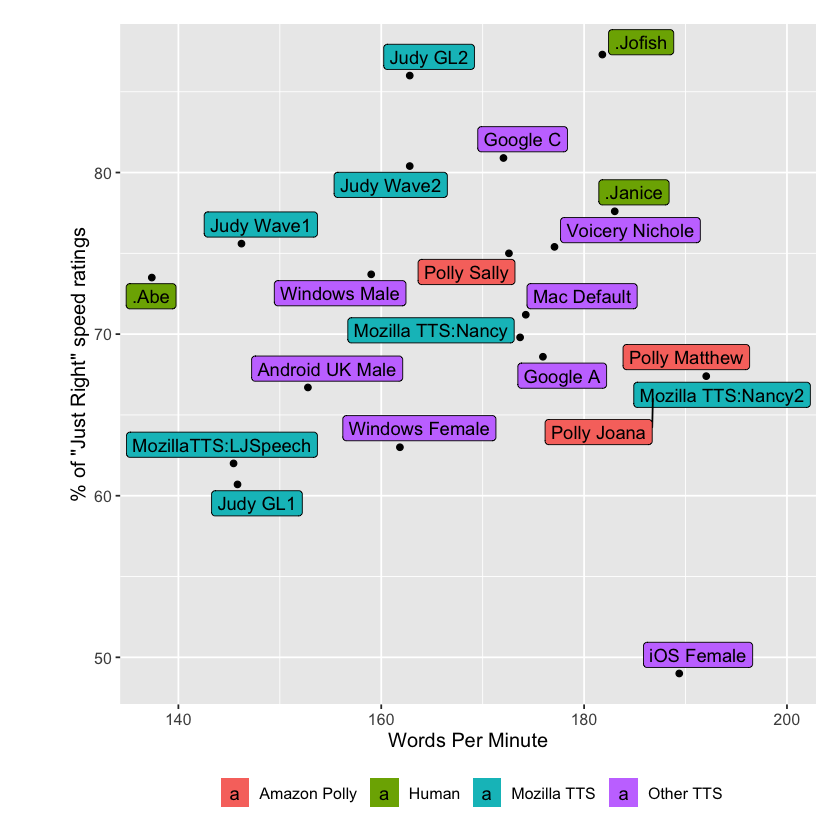

In [35]:
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.speed.simple), margin = 1), digits = 3)*100)
temp = subset(temp, Var1 %in% names(group_names.voice) & Var1 != "Text only" & Var2 == "Just right")

wpm = read.csv("~/Desktop/voice_quality_wpm.csv")

temp = merge(temp,wpm,by.x="Var1",by.y="Voice")
temp = merge(temp,group_names.voice.type,by.x="Var1",by.y=0)

ggplot(temp, aes(x = WPM, y = Freq))+#, geom_text = Var1)) +
  geom_point() + 
  #geom_smooth(method = "lm", formula = y ~ poly(x,2), se=TRUE, fullrange=TRUE, level=0.95, color = 'Black') +
  labs(y = "% of \"Just Right\" speed ratings", x = "Words Per Minute") +
  geom_label_repel(aes(label=Var1, fill=y)) + 
  #facet_wrap( ~ Var2, labeller = as_labeller(c("Good","Poor"))) +
  #theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        #axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        #axis.title.x = element_blank(),
        #strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = element_blank()))
  #scale_colour_brewer(palette = "PRGn") + 
  #scale_y_continuous(limits=c(0,1),breaks=seq(0,1,.2)) +
  #scale_x_continuous(limits=c(0,1),breaks=seq(0,1,.2))

ggsave("/Users/jmaddock/data/voice_comparison/img/wpm_scatter_8-2-19.png",height=6,width=7)

[1] -0.06569678

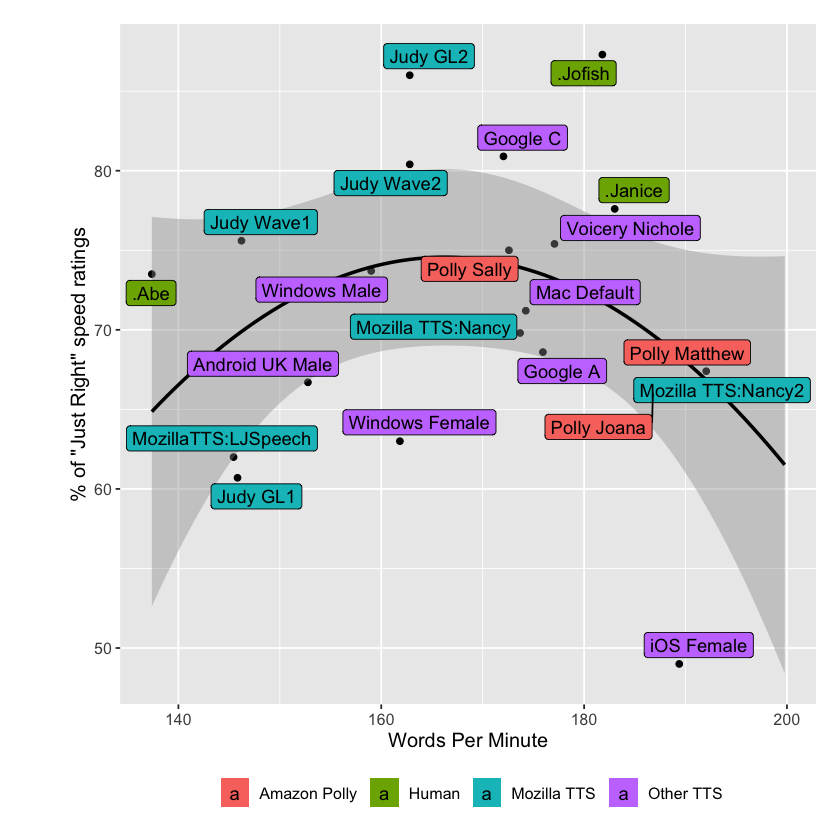

In [36]:
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.speed.simple), margin = 1), digits = 3)*100)
temp = subset(temp, Var1 %in% names(group_names.voice) & Var1 != "Text only" & Var2 == "Just right")

wpm = read.csv("~/Desktop/voice_quality_wpm.csv")

temp = merge(temp,wpm,by.x="Var1",by.y="Voice")
temp = merge(temp,group_names.voice.type,by.x="Var1",by.y=0)

cor(temp$WPM, temp$Freq)

ggplot(temp, aes(x = WPM, y = Freq))+#, geom_text = Var1)) +
  geom_point() + 
  geom_smooth(method = "lm", formula = y ~ poly(x,2), se=TRUE, fullrange=TRUE, level=0.95, color = 'Black') +
  labs(y = "% of \"Just Right\" speed ratings", x = "Words Per Minute") +
  geom_label_repel(aes(label=Var1, fill=y)) + 
  #facet_wrap( ~ Var2, labeller = as_labeller(c("Good","Poor"))) +
  #theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        #axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        #axis.title.x = element_blank(),
        #strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = element_blank()))
  #scale_colour_brewer(palette = "PRGn") + 
  #scale_y_continuous(limits=c(0,1),breaks=seq(0,1,.2)) +
  #scale_x_continuous(limits=c(0,1),breaks=seq(0,1,.2))

ggsave("/Users/jmaddock/data/voice_comparison/img/wpm_scatter_8-2-19.png",height=6,width=7)

[1] 0.01422832

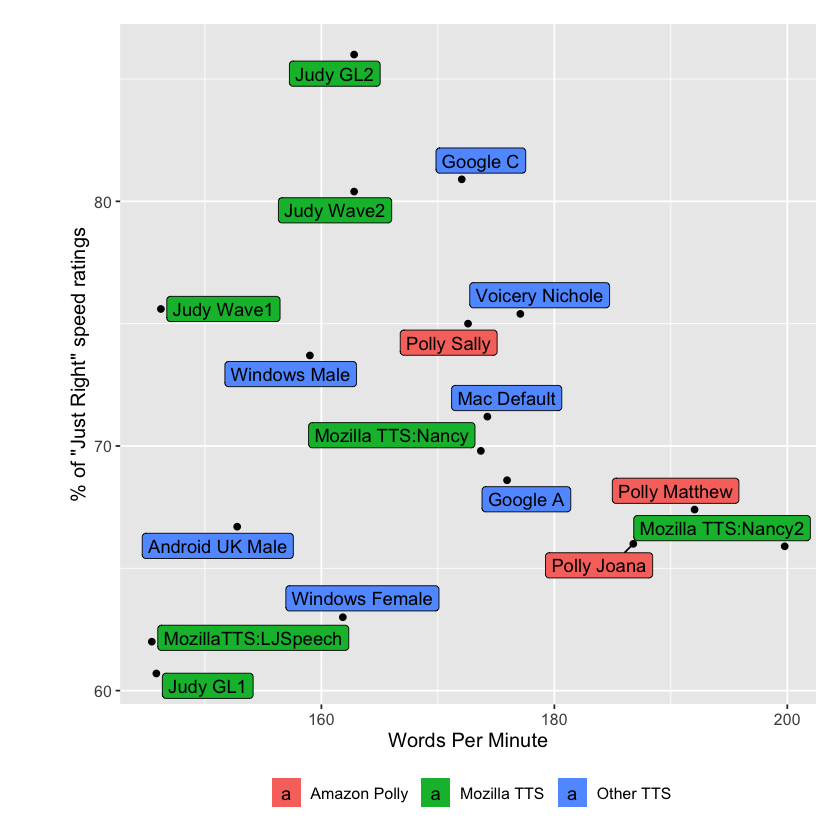

In [37]:
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.speed.simple), margin = 1), digits = 3)*100)
temp = subset(temp, Var1 %in% names(group_names.voice) & Var1 != "Text only" & Var2 == "Just right")
temp = subset(temp, !(Var1 %in% c('iOS Female','.Janice','.Abe','.Jofish')))

wpm = read.csv("~/Desktop/voice_quality_wpm.csv")

temp = merge(temp,wpm,by.x="Var1",by.y="Voice")
temp = merge(temp,group_names.voice.type,by.x="Var1",by.y=0)

cor(temp$WPM, temp$Freq)

ggplot(temp, aes(x = WPM, y = Freq, geom_text = Var1)) +
  geom_point() + 
  geom_smooth(method = "lm", formula = y ~ poly(x,2), se=TRUE, fullrange=TRUE, level=0.95, color = 'Black') +
  labs(y = "% of \"Just Right\" speed ratings", x = "Words Per Minute") +
  geom_label_repel(aes(label=Var1, fill=y)) + 
  #facet_wrap( ~ Var2, labeller = as_labeller(c("Good","Poor"))) +
  #theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        #axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        #axis.title.x = element_blank(),
        #strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = element_blank()))
  #scale_colour_brewer(palette = "PRGn") + 
  #scale_y_continuous(limits=c(0,1),breaks=seq(0,1,.2)) +
  #scale_x_continuous(limits=c(0,1),breaks=seq(0,1,.2))

ggsave("/Users/jmaddock/data/voice_comparison/img/wpm_scatter_8-3-19.png",height=6,width=7)

In [38]:
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.speed.simple), margin = 1), digits = 3)*100)
temp = subset(temp, Var1 %in% names(group_names.voice) & Var1 != "Text only" & Var2 == "Just right")

wpm = read.csv("~/Desktop/voice_quality_wpm.csv")

temp = merge(temp,wpm,by.x="Var1",by.y="Voice")
temp = merge(temp,group_names.voice.type,by.x="Var1",by.y=0)

summary(lm(Freq ~ WPM, temp))
summary(lm(Freq ~ poly(WPM,2), temp))


Call:
lm(formula = Freq ~ WPM, data = temp)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.5266  -4.6163   0.1515   4.4491  16.5119 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 77.05891   20.43120   3.772  0.00129 **
WPM         -0.03449    0.12019  -0.287  0.77723   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.198 on 19 degrees of freedom
Multiple R-squared:  0.004316,	Adjusted R-squared:  -0.04809 
F-statistic: 0.08236 on 1 and 19 DF,  p-value: 0.7772



Call:
lm(formula = Freq ~ poly(WPM, 2), data = temp)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3582  -4.8766   0.5526   5.9775  15.5389 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     71.224      1.899  37.501   <2e-16 ***
poly(WPM, 2)1   -2.640      8.704  -0.303   0.7651    
poly(WPM, 2)2  -15.618      8.704  -1.794   0.0896 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.704 on 18 degrees of freedom
Multiple R-squared:  0.1554,	Adjusted R-squared:  0.06156 
F-statistic: 1.656 on 2 and 18 DF,  p-value: 0.2187


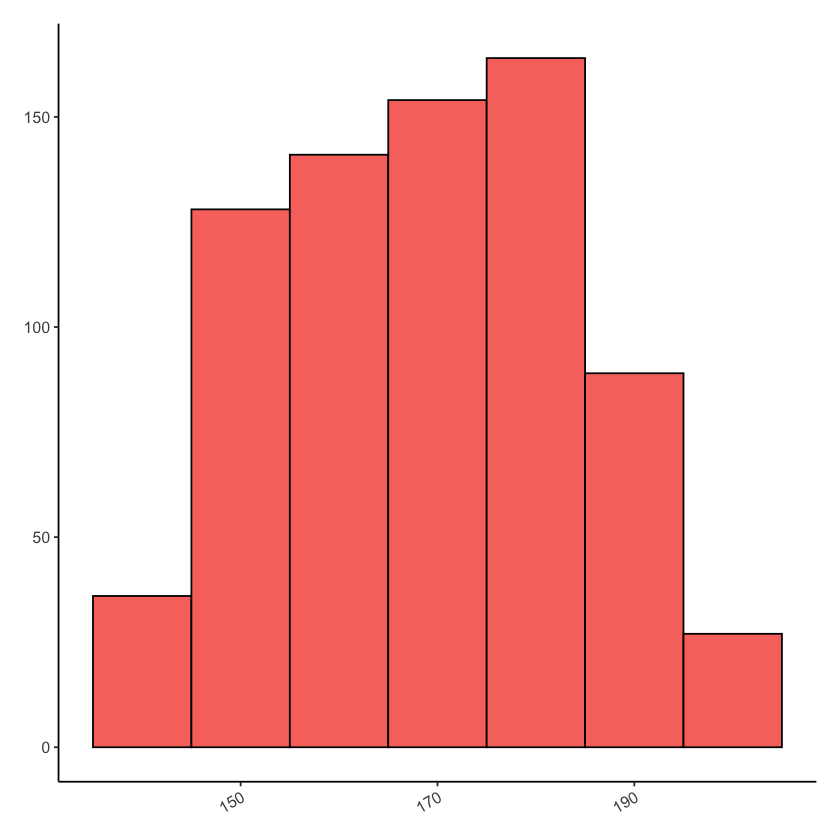

In [39]:
temp = subset(data, voice %in% names(group_names.voice) & voice != "Text only" & rate.speed == "Just right")
temp = merge(temp,wpm,by.x='voice',by.y="Voice")
ggplot(temp, aes(x = WPM, color = "black", fill = "")) +
  geom_histogram(stat = "bin", binwidth = 10, color = "black") +
  #facet_wrap( ~ voice, ncol = 4, labeller = as_labeller(group_names.voice, label_wrap_gen(width = 20)), drop = TRUE) +
  guides(color = FALSE, fill=FALSE) + 
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(1, "lines"))